In [10]:
from astropy import units as u
from astropy import constants as c
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dt = 10.737419128417969*u.s # sample rate in SI seconds
sec_LST = (1*u.sday/(24.*3600.)).to(u.s).value
ds = dt/sec_LST # length of each sample in sidereal seconds
dT = (1*u.day - 1*u.sday).to(u.s)
print(sec_LST)
print(ds)
print(dT)

0.997269566319
10.7668172088 s
235.90947 s


In [23]:
def MofN(N):
    dchunk_sid = 86400./N
    M = dchunk_sid / ds
    return M, dchunk_sid

In [24]:
Nvec = np.arange(300,750)
Mvec, dchunk_sid_vec = MofN(Nvec)

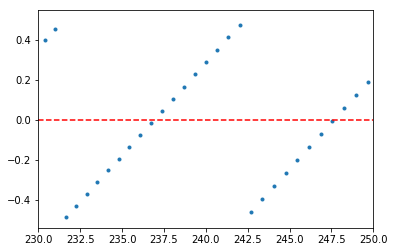

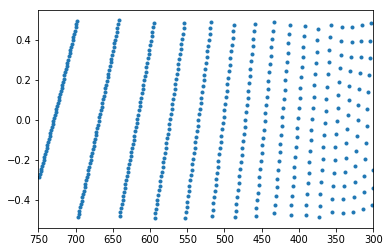

In [28]:
plt.plot(dchunk_sid_vec,Mvec-np.round(Mvec),'.')
plt.axhline(0,color='r',linestyle='--')
plt.xlim([230,250])
plt.show()
plt.plot(Nvec,Mvec-np.round(Mvec),'.')
plt.xlim([750,300])
plt.show()

In [31]:
86400./349.

247.5644699140401

In [30]:
MofN(349)

(<Quantity 22.99328252 1 / s>, 247.5644699140401)

In [3]:
fac = dT/ds
print(fac)

125.1411355518898


In [4]:
# How much, in time, will you be off, if you just pick the nearest LST sample in time?
LST_err = (np.round(fac,0)-fac)*ds

In [5]:
LST_err

<Quantity -0.2660613 s>

In [6]:
# Claim: it is always possible to find a time sample whose center differs from the given time sample by LST_err
# Let's just try this
nsamp_per_day_SI = int((1*u.day/dt).to(u.dimensionless_unscaled))
nsamp_per_day_SI

45957

In [7]:
# OK, so we have a bunch of time samples, and we've relabeled them so they are evently stepped in sidereal time.  
# Observing for 24 SI hours gives more than 1 sidereal day.  Great.
LST1 = np.arange(nsamp_per_day_SI)*ds
print(LST1.min(),LST1.to(u.day).max())
print((nsamp_per_day_SI*dt).to(u.day))

0.0 s 1.0027063416855633 d
0.9999902777777776 d


In [8]:
LST2 = dT+np.arange(nsamp_per_day_SI)*ds

In [9]:
n = 1000 # pick an arbitrary sample
m = int(n - fac)

In [10]:
LST1[n]

<Quantity 1885.1472696 s>

In [11]:
LST2[m]

<Quantity 1883.52818363 s>

In [12]:
LST1[n]-LST2[m]

<Quantity 1.61908597 s>

In [13]:
LST1[n+12]-LST2[m+12]

<Quantity 1.61908597 s>

In [14]:
dt

<Quantity 1.88 s>

In [15]:
ds

<Quantity 1.88514727 s>